# Классификация методом k ближайших соседей

In [46]:
# Загружаем основные библиотеки
from sklearn.datasets import load_digits
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
digits = load_digits()

In [48]:
# Размер выборки
digits.data.shape

(1797, 64)

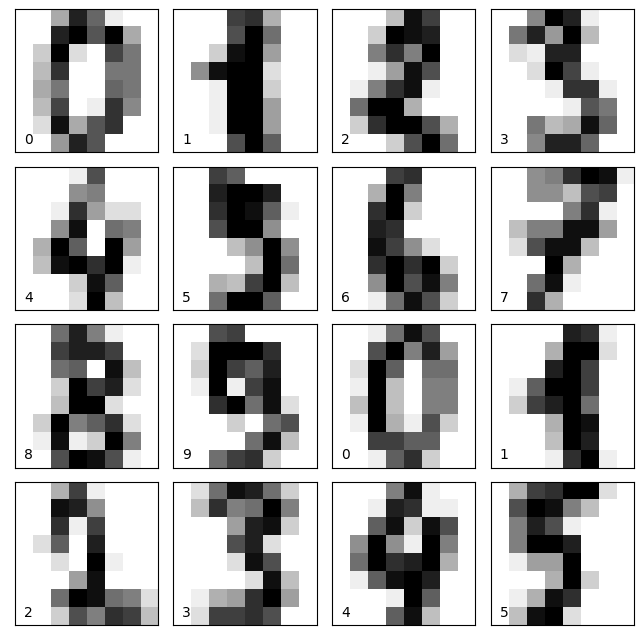

In [49]:
# Визуализируем некоторые элементы датасета
fig = plt.figure(figsize=(8, 8)) 
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    ax.text(0, 7, str(digits.target[i]))

In [50]:
# Библиотеки, необходимые для обучения модели
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Разделяем датасет на тренировочную и тестовую выборки в отношении 70:30
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=23)

In [52]:
# Обучаем модель KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Предсказываем результаты на тестовой выборке
y_test_predict = knn.predict(X_test)

In [54]:
# Предсказанные значения
y_test_predict[:20]

array([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 5, 8, 7, 8, 3, 1, 8, 8, 8])

In [55]:
# Реальные значения
y_test[:20]

array([4, 6, 5, 8, 5, 4, 0, 5, 4, 5, 6, 5, 8, 7, 8, 3, 1, 8, 8, 8])

In [57]:
# Точность модели
acc = accuracy_score(y_test,y_test_predict)
print(f'Средняя точность: {acc:.3%}')

Средняя точность: 98.333%


In [58]:
# Основные метрики 
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        51
           3       0.96      1.00      0.98        48
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        49
           8       0.98      0.96      0.97        51
           9       0.98      0.94      0.96        66

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



<AxesSubplot: >

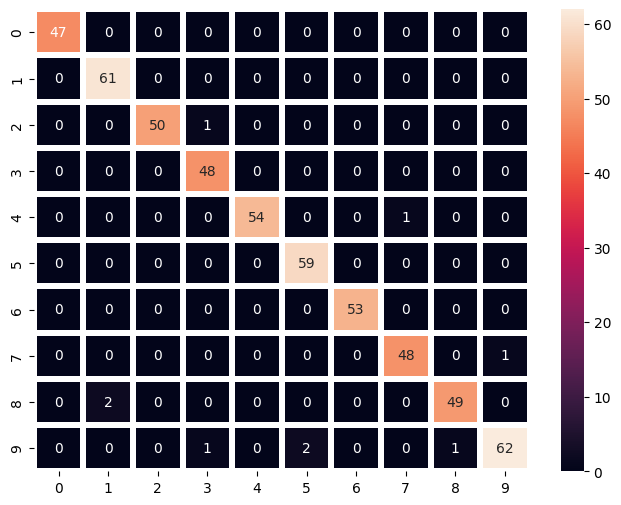

In [60]:
# Матрица путаницы
plt.figure(figsize = (8,6)) 
knc_cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(knc_cm,annot=True,fmt='d',linewidth=3)

In [61]:
# K-hold перекрестная проверка
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [62]:
print(f'Средняя точность: {scores.mean():.2%}')

Средняя точность: 98.78%


In [63]:
print(f'Стандартное отклонение точности: {scores.std():.2%}')

Стандартное отклонение точности: 0.74%


In [74]:
# Подбор параметров модели
knc_params={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'],
    'n_neighbors':range(1,10)
}

In [75]:
# Нахождение параметров модели по сетке
knc = KNeighborsClassifier()
knc_GS = GridSearchCV(knc,knc_params,cv=5)
knc_GS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']})

In [76]:
print('Лучшие параметры:',knc_GS.best_params_)

Лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [67]:
# Обучение модели с ранее найденными параметрами
knc_cv = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 1, weights= 'uniform')
knc_cv.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
y_test_predict_cv = knc_cv.predict(X_test)
acc = accuracy_score(y_test,y_test_predict_cv)
print(f'Средняя точность: {acc:.3%}')

Средняя точность: 98.519%


In [69]:
print(classification_report(y_test,y_test_predict_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      0.98      0.98        61
           2       1.00      0.96      0.98        51
           3       0.96      1.00      0.98        48
           4       1.00      1.00      1.00        55
           5       0.95      1.00      0.98        59
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        49
           8       0.98      0.98      0.98        51
           9       0.98      0.95      0.97        66

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



<AxesSubplot: >

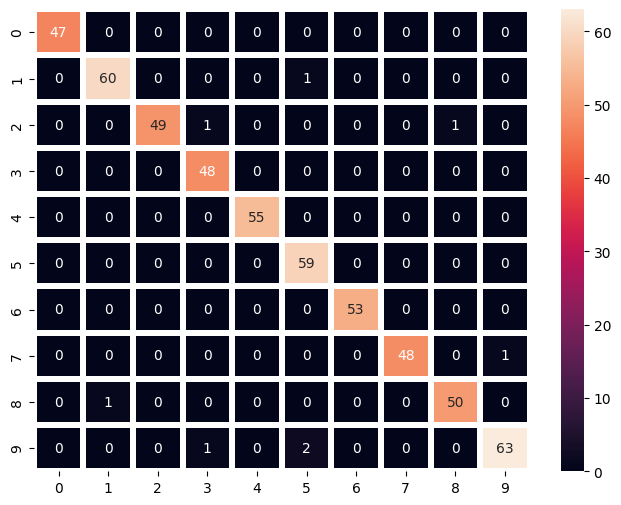

In [70]:
plt.figure(figsize = (8,6)) 
knc_cm = confusion_matrix(y_test,y_test_predict_cv)
sns.heatmap(knc_cm,annot=True,fmt='d',linewidth=3)

**Лучшей моделью выступает модель, полученная с помощью K-hold перекрестной проверки. Она показывает точность 98.78%**